<a href="https://colab.research.google.com/github/PaulToronto/Applied-Geospatial-Data-Science-with-Python---Book/blob/main/2_8_Folium_Raster_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Folium Raster Layers

## Imports

In [1]:
import folium
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

drive_path = '/content/gdrive/MyDrive/Colab Notebooks/Data Science/Applied Geospatial Data Science with Python - Book/data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Tiles

In [3]:
lon, lat = -38.625, -12.875
zoom_start = 8

### Built-in tilesets

In [4]:
folium.Map(location=[lat, lon], tiles='OpenStreetMap', zoom_start=zoom_start)

In [5]:
folium.Map(location=[lat, lon], tiles='Cartodb Positron', zoom_start=zoom_start)

In [6]:
folium.Map(location=[lat, lon], tiles='Cartodb dark_matter', zoom_start=zoom_start)

### Custom tiles

In [7]:
attr = (
    '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
    'contributors, &copy; <a href="https://cartodb.com/attributions">CartoDB</a>'
)
tiles = "https://{s}.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png"

folium.Map(location=[lat, lon], tiles=tiles, attr=attr, zoom_start=zoom_start)

### Other tilesets

- https://leaflet-extras.github.io/leaflet-providers/preview/
- https://github.com/geopandas/xyzservices

## `ImageOverlay`

### Using an image from disk


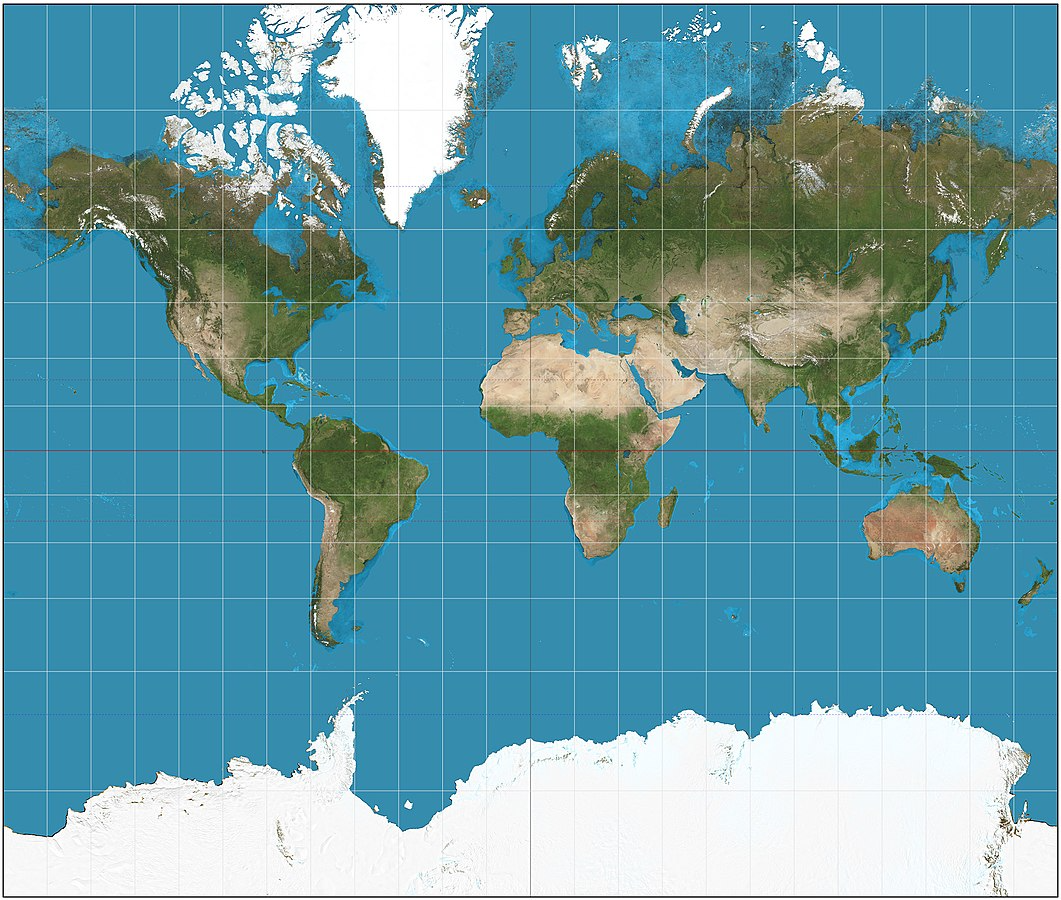

In [8]:
m = folium.Map([37, 0], zoom_start=1)
merc = drive_path + 'Mercator_projection_SW.png'

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW',
    image=merc,
    bounds=[[-82, -180], [82, 180]],
    opacity=0.6,
    interactive=True,
    cross_origin=False,
    zindex=1
)

folium.Popup('I am an image').add_to(img)

img.add_to(m)
folium.LayerControl().add_to(m)

m

In [9]:
m = folium.Map([37, 0], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image='https://upload.wikimedia.org/wikipedia/commons/f/f4/Mercator_projection_SW.jpg',
    name='I am a jpeg',
    bounds=[[-82, -180], [82, 180]],
    opacity=1,
    interactive=False,
    cross_origin=False,
    zindex=1,
    alt='Wikipedia File:Mercator projection SW.jpg'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Creating an image with `numpy`

In [10]:
image = np.zeros([61, 61])
image[0, :] = 1.0
image[59, :] = 1.0
image[:, 0] = 1.0
image[:, 59] = 1.0
image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])


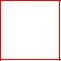

In [11]:
m = folium.Map([37, 0], zoom_start=2)

folium.raster_layers.ImageOverlay(
    image=image,
    bounds=[[0, -60], [60, 60]],
    colormap = lambda x: (1, 0, 0, x)
).add_to(m)

m

## `VideoOverlay`

In [12]:
m = folium.Map(location=[22.5, -115], zoom_start=4)

video = folium.raster_layers.VideoOverlay(
    video_url='https://www.mapbox.com/bites/00188/patricia_nasa.webm',
    bounds=[[32, -130], [13,-100]],
    opacity=0.65,
    attr='Video from patricia_nasa',
    autplay=True,
    loop=False
)

video.add_to(m)

m

## `WmsTileLayer`

- web map service

In [13]:
m = folium.Map(location=[41, -70], zoom_start=5, tiles='Cartodb Positron')

folium.WmsTileLayer(
    url='https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi',
    name='test',
    fmt='image/png',
    layers='nexrad-n0r-900913',
    attr=u'Weather data © 2012 IEM Nexrad',
    transparent=True,
    overlay=True,
    control=True
).add_to(m)

folium.LayerControl().add_to(m)


m